<a href="https://www.kaggle.com/code/aakash15071996/sales-analysis?scriptVersionId=126002739" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salesdata/Sales_August_2019.csv
/kaggle/input/salesdata/Sales_May_2019.csv
/kaggle/input/salesdata/Sales_February_2019.csv
/kaggle/input/salesdata/Sales_November_2019.csv
/kaggle/input/salesdata/Sales_January_2019.csv
/kaggle/input/salesdata/Sales_March_2019.csv
/kaggle/input/salesdata/Sales_September_2019.csv
/kaggle/input/salesdata/Sales_April_2019.csv
/kaggle/input/salesdata/Sales_July_2019.csv
/kaggle/input/salesdata/Sales_October_2019.csv
/kaggle/input/salesdata/Sales_June_2019.csv
/kaggle/input/salesdata/Sales_December_2019.csv


# Project:
In this project, we are going to analyze 12 months of data of sales. We will learn how to clean, manage and analyze the dataset to find some meaningful information.
We start by cleaning our data. Tasks during this section include:
Drop NaN values from DataFrame
Removing rows based on a condition
Change the type of columns (to_numeric, to_datetime, astype)
Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:

# Read One datasets

In [2]:
april = pd.read_csv('/kaggle/input/salesdata/Sales_April_2019.csv')
april.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
253,176798,iPhone,1,700,04/06/19 10:31,"445 Jefferson St, Atlanta, GA 30301"
14472,190357,Flatscreen TV,1,300,04/19/19 18:58,"493 West St, Austin, TX 73301"
2183,178641,USB-C Charging Cable,1,11.95,04/18/19 13:09,"435 8th St, New York City, NY 10001"
4128,180514,iPhone,1,700,04/15/19 16:28,"958 1st St, Portland, OR 97035"
7097,183330,Macbook Pro Laptop,1,1700,04/18/19 02:07,"197 6th St, San Francisco, CA 94016"


# Merge all Data in one DataFrame OS

In [3]:
path = r'/kaggle/input/salesdata'
files = os.listdir(path)

df = pd.DataFrame()  # Create a empty Datafram for merge all months of datas in this df

for file in files:
    read_data = pd.read_csv(fr'{path}/{file}')
    df = pd.concat([df,read_data])

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# Cleaning the Data

In [4]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df = df.dropna()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [6]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [8]:
df['temp'] = df['Order ID'].str.isnumeric()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df = df.loc[df['temp'] == True]
df = df.drop(columns='temp')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# Change Data Type

In [10]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [11]:
df = df.astype(

{
    'Order ID': 'int64',
    'Quantity Ordered' : 'int64',
       'Price Each' : 'float'
}

)

df['Order Date'] = pd.to_datetime(df['Order Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


# Creating new important Columns

# Create a function to split city name formm address columns

There is no City Column in our Dataset, But you can see Purchase Address ,where City is mentioned in middle, we can use Purchase address and create a City Column.

In [13]:
def cities(str):
    res = list(str.split(','))
    return res[1]

In [14]:
df['City'] = df['Purchase Address'].apply(cities)
df['Sales Amount'] = (df['Quantity Ordered'] * df['Price Each']).round(1)
df['Months Name'] = df['Order Date'].dt.month_name()
df['Months'] = df['Order Date'].dt.month
df['Minuts'] = df['Order Date'].dt.minute
df['Hour'] = df['Order Date'].dt.hour

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales Amount,Months Name,Months,Minuts,Hour
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,24.0,August,8,21,22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,100.0,August,8,11,15
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,700.0,August,8,40,14
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,7.7,August,8,59,20
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,7.7,August,8,53,19
...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",San Francisco,15.0,December,12,58,20
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",Los Angeles,7.7,December,12,1,12
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",Seattle,400.0,December,12,43,6
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",Dallas,12.0,December,12,39,10


# Now We can analysis the Questions

# Q1: What was the best month for sales? How much was earned that month?

In [15]:
best_month = df.groupby(['Months','Months Name'])['Sales Amount'].sum().reset_index()
best_month

,Months,Months Name,Sales Amount
0,1,January,1822379.9
1,2,February,2202181.7
2,3,March,2807291.9
3,4,April,3390902.7
4,5,May,3152815.8
5,6,June,2577972.3
6,7,July,2647957.7
7,8,August,2244616.6
8,9,September,2097710.2
9,10,October,3736990.5


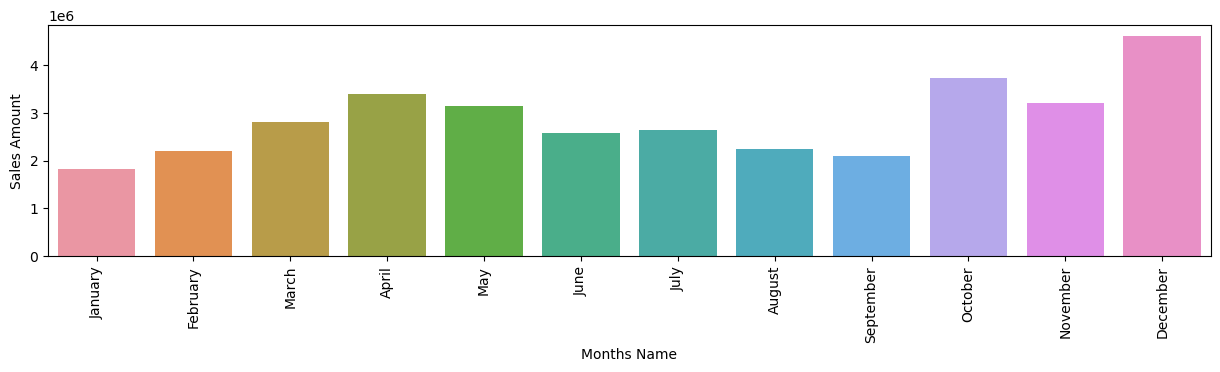

In [16]:
plt.figure(figsize=(15,3))
sns.barplot(x='Months Name',y='Sales Amount',data=best_month)
plt.xticks(rotation=90)
plt.show()

# Insight: The December month is highest in sales.

# Q2: What city sold the most product?

In [17]:
most_city = df.groupby('City')['Quantity Ordered'].sum().reset_index()
most_city

,City,Quantity Ordered
0,Atlanta,16602
1,Austin,11153
2,Boston,22528
3,Dallas,16730
4,Los Angeles,33289
5,New York City,27932
6,Portland,14053
7,San Francisco,50239
8,Seattle,16553


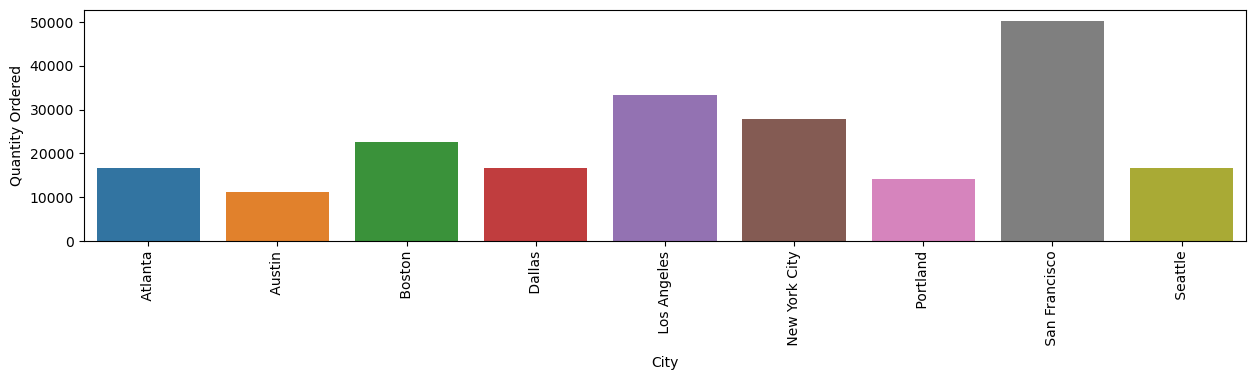

In [18]:
plt.figure(figsize=(15,3))
sns.barplot(x='City',y='Quantity Ordered',data=most_city)
plt.xticks(rotation=90)
plt.show()

# Insight: The San Francisco is most sold city in Product Qty.

# Q3: What product sold the most? Why do you think it sold the most?

In [19]:
most_products = df.groupby('Product')['Quantity Ordered'].sum().reset_index()
most_products

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


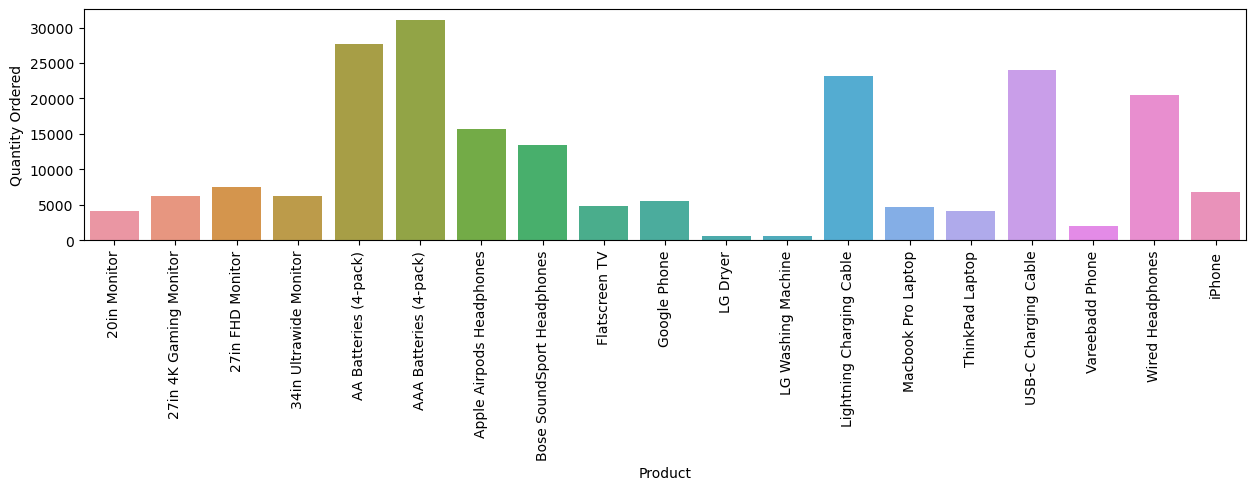

In [20]:
plt.figure(figsize=(15,3))
sns.barplot(x='Product',y='Quantity Ordered',data=most_products)
plt.xticks(rotation=90)
plt.show()

# Insight: The ''AAA Batteries (4-pack)'' is most sale of products

# Q4: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [21]:
tim = df.groupby('Hour')['Sales Amount'].sum().sort_values(ascending=False).reset_index()
tim

,Hour,Sales Amount
0,19,2413102.0
1,12,2316983.0
2,11,2300772.1
3,20,2281868.2
4,18,2219505.4
5,13,2155546.6
6,17,2129503.3
7,14,2083810.9
8,21,2042139.0
9,10,1944427.3


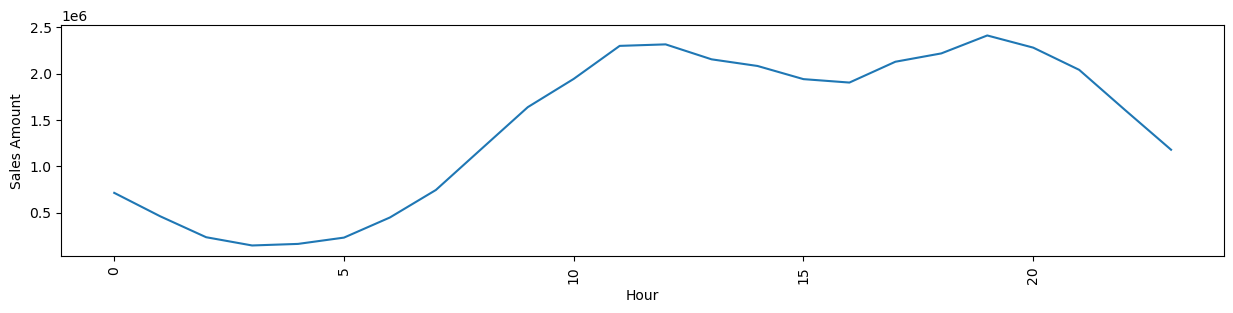

In [22]:
plt.figure(figsize=(15,3))
sns.lineplot(x='Hour',y='Sales Amount',data=tim)
plt.xticks(rotation=90)
plt.show()



# Q5: What products are most often sold together?

# This is going to be a tricky business. Before diving into the problem, let us understand the problem. 
What Products are most often sold together gives a very important insight that helps company lure customers into spending more and generate more profit.
You must have seen Amazon's Customer Who Bought this item also bought this Item. We are going to do something like this.
Let's try to solve this problem Step by step : 

In [23]:
# All Duplicate Order ID 
df = df[df['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales Amount,Months Name,Months,Minuts,Hour
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",San Francisco,7.7,August,8,12,20
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",San Francisco,12.0,August,8,12,20
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",San Francisco,700.0,August,8,28,9
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",San Francisco,150.0,August,8,28,9
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",New York City,600.0,August,8,17,10
...,...,...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",Portland,12.0,December,12,30,0
25040,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",New York City,700.0,December,12,44,8
25041,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",New York City,15.0,December,12,44,8
25076,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",Austin,380.0,December,12,35,22


# Group Different Products With Same Order ID : 
Let's create a new column that contains different Products with the same Order ID. We can do this with the help of transform method.

In [24]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales Amount,Months Name,Months,Minuts,Hour,Grouped
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",San Francisco,7.7,August,8,12,20,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",San Francisco,12.0,August,8,12,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",San Francisco,700.0,August,8,28,9,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",San Francisco,150.0,August,8,28,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",New York City,600.0,August,8,17,10,"Google Phone,Wired Headphones"
63,236730,Wired Headphones,1,11.99,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",New York City,12.0,August,8,17,10,"Google Phone,Wired Headphones"
132,236799,Google Phone,1,600.00,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",San Francisco,600.0,August,8,38,12,"Google Phone,Wired Headphones"
133,236799,Wired Headphones,1,11.99,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",San Francisco,12.0,August,8,38,12,"Google Phone,Wired Headphones"
163,236829,Vareebadd Phone,1,400.00,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",Los Angeles,400.0,August,8,51,8,"Vareebadd Phone,USB-C Charging Cable"
164,236829,USB-C Charging Cable,1,11.95,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",Los Angeles,12.0,August,8,51,8,"Vareebadd Phone,USB-C Charging Cable"


In [25]:
from itertools import combinations
from collections import Counter

count = Counter()
row_list = []
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 271),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 193),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 146),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 109),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 101),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 86),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 75),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  50),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  20),
 (('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'),
  17)]

This is pretty simple , we will group all product and calculate quantity ordered.

<AxesSubplot:xlabel='Product'>

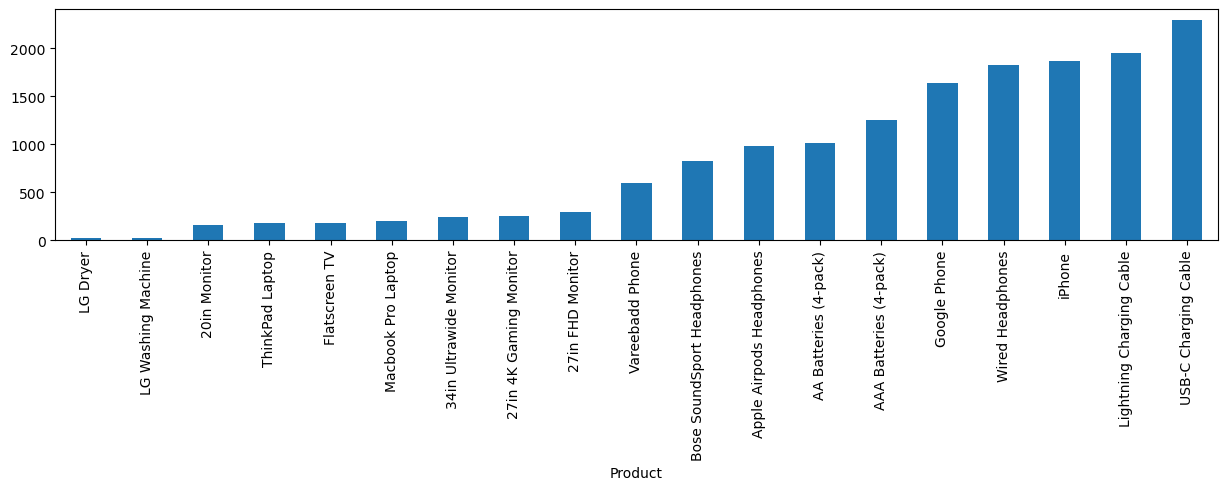

In [26]:
plt.figure(figsize=(15,3))
df.groupby('Product')['Quantity Ordered'].sum().sort_values().plot(kind='bar')

# Insight: USB-C Charging Cable are most sold together